# Predicting House Price with Multivariable Linear Regression

# A Commphrensive Study


[Original Data Source](https://scikit-learn.org/stable/datasets/index.html)

In [1]:
# questionto be asked in this section includes
# house size, location, year built, crimea ratio, distance to social amenities like shooping mall, good school
# also i will be showing how each factor contribute to each factor so not just a single number. 

               # Lists of Variable used in regression analysis

    

# CRIM = crime per capita crime rate by town
# ZN = proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS =  proportion of non-retail business acres per town
# CHAS = Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX nitric oxides concentration (parts per 10 million)
# RM  = average number of rooms per dwelling
# AGE = proportion of owner-occupied units built prior to 1940
# DIS = weighted distances to five Boston employment centres
# RAD = index of accessibility to radial highways
# TAX = full-value property-tax rate per $10,000
# PTRATIO = pupil-teacher ratio by town
# B = 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT =  % lower status of the population
# MEDV = Median value of owner-occupied homes in $1000’s


In [196]:
from sklearn.datasets import load_boston # data set from open source from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


%matplotlib inline

## This execerise is compose of three main section

## Part one is Gather Data, Clean Data and explore and visualise the data

## part two is Train the Algorithm

## Final part three is Deploy and Evaluate our finding 

In [4]:
type(boston_data) # checking what type of data set we have

sklearn.utils.Bunch

In [5]:
boston_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

## next step is to clean and exploring the dataset at the same time with Pandas dataframe

In [9]:
boston_data.data.shape #  checking the size of our data and shows 506 rows and 13 columns

(506, 13)

In [13]:
boston_data.feature_names  # feature that determines the house price

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [14]:
boston_data.target # house prices in thousands

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [16]:
# Create a pandas dataframe
data = pd.DataFrame(data=boston_data.data, columns=boston_data.feature_names)

# Add column with the price
data['Price'] = boston_data.target

In [19]:
data.head() # checking the dataframe at a glance with first 5 dataset with head or tail 
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [20]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
Price      506
dtype: int64

## checking for missing values

In [23]:
data.isnull().any() # .any() gives quick information on the dataframe if any missing values or not 

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
Price      False
dtype: bool

In [25]:
data.info() # another method on checking for missing values 

## from our dataframe there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising the data part 1 (Histogram, Distributions and Outliers)

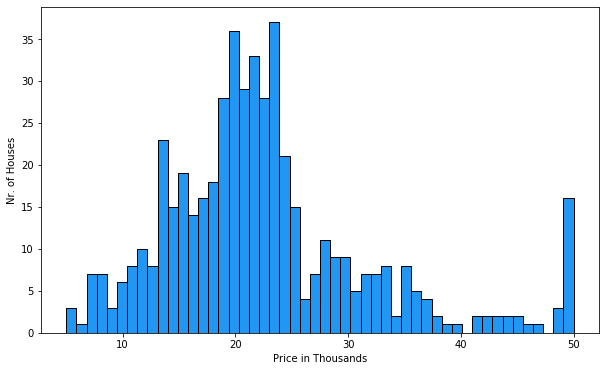

In [45]:

plt.figure(figsize = (10,6))
plt.hist(data['Price'], bins = 50, ec='black', color='#2196f3')
plt.xlabel('Price in Thousands')
plt.ylabel('Nr. of Houses')
plt.show()

## Visualising the data part 2 ( Seaborn and Probability Density Functions) 

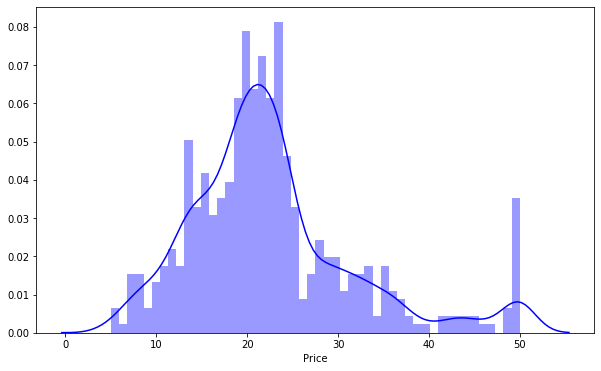

In [50]:
plt.figure(figsize = (10,6))

sns.distplot(data['Price'], bins = 50,  color = 'blue')
plt.show()

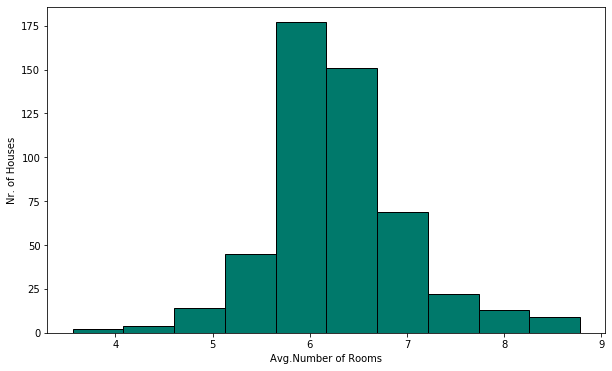

In [48]:

plt.figure(figsize = (10,6))
plt.hist(data['RM'], bins = 10, ec='black', color='#00796b')
plt.xlabel('Avg.Number of Rooms')
plt.ylabel('Nr. of Houses')
plt.show()

In [49]:
data['RM'].mean()

6.284634387351787

## Working with Index Data, Panda Series, and Dummies Variable

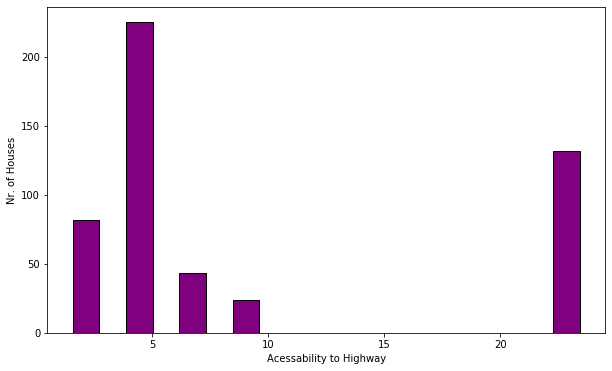

In [67]:

plt.figure(figsize = (10,6))
plt.hist(data['RAD'],  ec='black', color='purple', rwidth = 0.5)
plt.xlabel('Acessability to Highway')
plt.ylabel('Nr. of Houses')
plt.show()

In [55]:
data['RAD'].value_counts() ## histrogram above is a bit unsual and after further investigation found out from 'RAD' values that 
                            # it an index for mesurment btw 1 and 24. 1 means poor and 24 means great access to highway

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

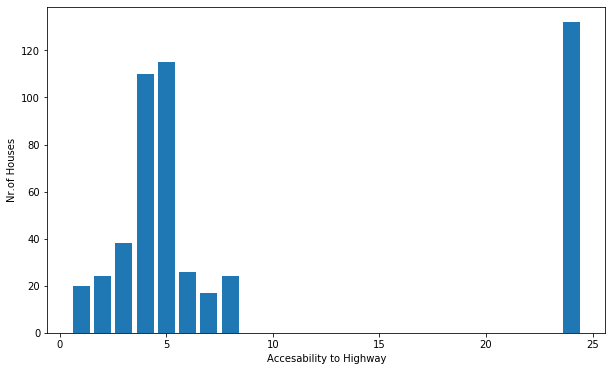

In [66]:
frequency = data['RAD'].value_counts()
#frequency.index
#frequency.axes[0]

plt.figure(figsize =(10,6))  ## plotting using bar chart instead have given us a clearer view with our python .value_counts() gave the bar chart a good axis
plt.xlabel('Accesability to Highway')
plt.ylabel('Nr.of Houses')
plt.bar(frequency.index, height = frequency)

plt.show()

In [70]:
data['CHAS'].value_counts() # this shows how many houses are next to the Charles river in boston and we see later if prices goes up if next to the river or not
                            # the information 1 or 0 is a dummy variable can only be 1 or 0 .

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistics

In [71]:
## this is a quick deviaition to show how the mean and median of a distribution can varies. in a normal distribution both are the
## same value but what if the distribution is not evenly distributed

In [72]:
data['Price'].min()

5.0

In [73]:
data['Price'].max()

50.0

In [74]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
Price        5.00000
dtype: float64

In [75]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
Price       50.0000
dtype: float64

In [76]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
Price       22.532806
dtype: float64

In [77]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
Price       21.20000
dtype: float64

In [79]:
data.describe() # table below gives all the descriptive values as we see mean is much different from median(50%)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

In [80]:
## correlation is the measure of direction of two varibles how they relate. for example ice crea comsumption and hot weather
## this will be positive correlation since more people take ice cream in hot weather than winter. and negative correlation is 
## increase in sale of umbrella in summer time. There also can be no correlation number of divorce in london to comsumption of pizza

In [81]:
## will be looking into two area of correlation the STRENGTH and DIRECTION


## Calculating Correlations and problem pose by Multicollinearity

## $$ \rho _{xy} = corr(X,Y)$$
## $$ -1.0 \leq\rho _{XY} \leq + 1.0 $$

In [83]:
data['Price'].corr(data['RM']) # calculation of correlation of house price to number of rooms gives us a big positive correlation 
# mean the more rooms in a house the higher the price of the house

0.6953599470715386

In [85]:
data['Price'].corr(data['PTRATIO']) # correlation between house price and pupil teacher ratio is negative.
# As number of student grows per teacher the quality of education standard reduces there by housing prices in that area reduces with it

-0.5077866855375616

In [87]:
data.corr() # Pearson Correlation Coefficients
            # correllation of each variable to eachother

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [92]:
## Are all high correlation good thing well not. Imagine doing a medical research for weight and body fat. 
#Increase weight correlate perfectly with increase body fat what about a body builder with big weight but very small body fat this is call multicollinearity
# with high colleration need deeper investogation into why or our finding will be unrelaible.

# I will re-visit this question when later i get down to regression analysys onn multicollinearity

# Visualising Correlations with a Heatmap

In [93]:
data.corr() # Pearson Correlation Coefficients
            # correllation of each variable to eachother

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [98]:
# this code is to produce a tiangle since half the table are identical in correlation so i just need half of it
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices]= True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

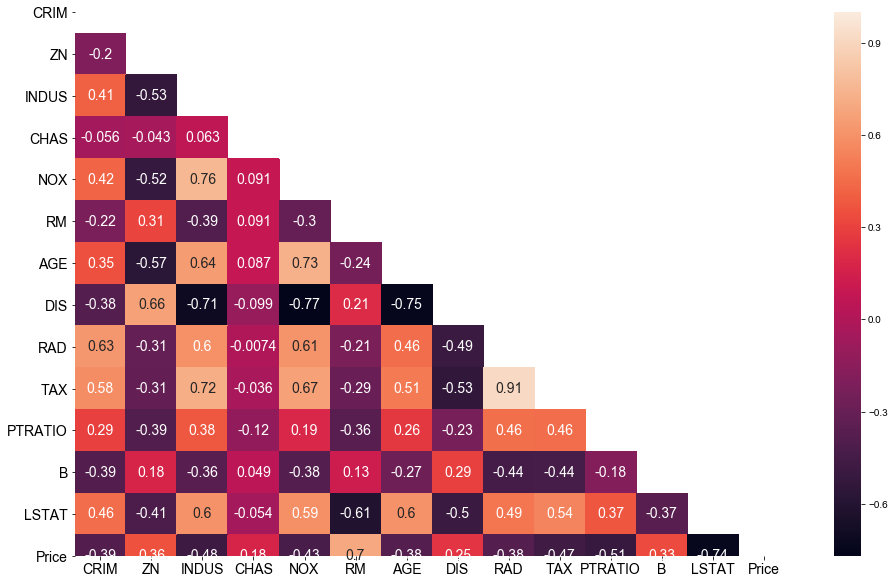

In [107]:
plt.figure(figsize =(16,10))
sns.heatmap(data.corr(), mask = mask, annot=True, annot_kws={'size' : 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [108]:
# Above heat map shows different correlation and we seen many high correlation  such as Tax and radial to highway(RAD)which is not a continues variable is high but no real correlation
# with this I will exclude irrelevant data

# deeper investingation into correlation using scatter plot

In [110]:

# creating a scatter plot between DIS(Distance) and NOX(Pollution)

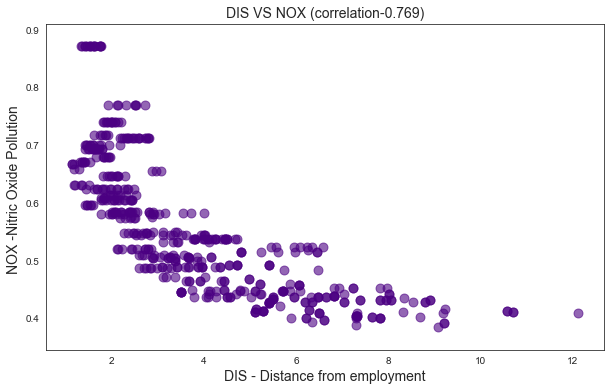

In [125]:
nox_dis_corr = round(data['DIS'].corr (data['NOX']), 3)


plt.figure(figsize=(10,6))
plt.scatter(x=data['DIS'], y=data['NOX'], alpha = 0.6, s=80, color='indigo')



plt.title(f'DIS VS NOX (correlation{nox_dis_corr})', fontsize = 14)
plt.xlabel('DIS - Distance from employment', fontsize = 14)
plt.ylabel('NOX -Nitric Oxide Pollution ', fontsize = 14)
plt.show()

In [126]:
# above scatter correlation plot show a negative the bigger the distance from the city the lower the pollutin index.

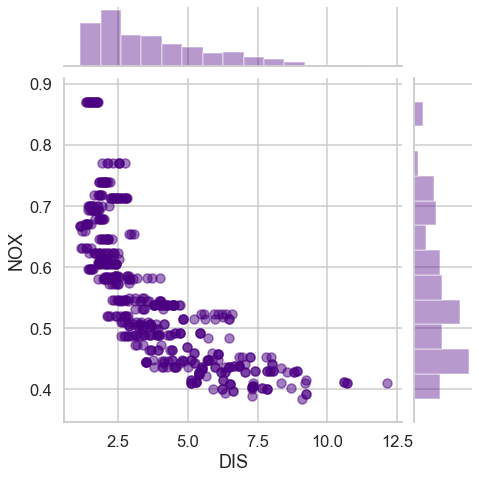

In [135]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], size=7, color = 'indigo', joint_kws={'alpha':0.5})
plt.show()

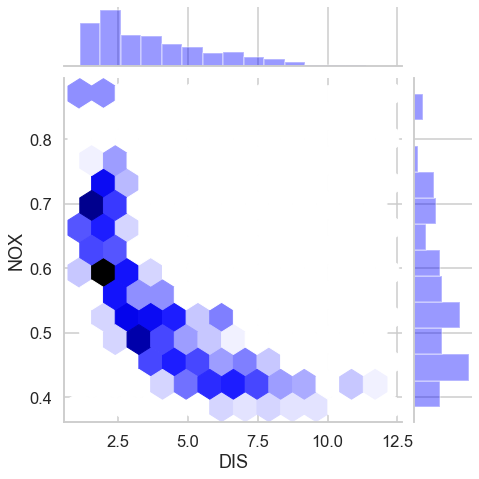

In [137]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], size=7, color = 'blue', kind = 'hex')
plt.show()

# Split Training and Test Data

In [138]:
# this section will be using our data set for regression. will split the data for training and test. will use 80% for training and 20% to test our result

In [145]:
prices = data['Price']
features = data.drop('Price', axis = 1)

X_train, X_test, y_train, y_test= train_test_split(features,prices, test_size=0.2, random_state = 10)



# % of training data set
len(X_train) / len(features)

0.7984189723320159

In [147]:
# % of test data set
X_test.shape[0] / features.shape[0]

0.2015810276679842

## Multivariable Regression

## Calculating the Model Fit with R-Squared

In [153]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print('Intercept', reg.intercept_)
pd.DataFrame(data = reg.coef_, index = X_train.columns, columns = ['coef']) 

#below is a table with each coef to price. negative mean not desireable like the crime or poluution(NOX).
# having a house near the river(CHAS) with river view is desirable and higher price or number of rooms(RM) 

Intercept 36.53305138282393


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [156]:
# above result shows that for ecery extra room(RM) will cost extra 3000 dollars


# print out the r-squared for training and test datasets

print ('Training data t-squared:' , reg.score(X_train, y_train))

Training data t-squared: 0.750121534530608


In [158]:
print('Test data r-squared:', reg.score(X_test,y_test))

Test data r-squared: 0.670933983911563


In [160]:
print('Intercept', reg.intercept_)
pd.DataFrame(data = reg.coef_, index = X_train.columns, columns = ['coef']) 

print ('Training data t-squared:' , reg.score(X_train, y_train))

print('Test data r-squared:', reg.score(X_test,y_test))

Intercept 36.53305138282393
Training data t-squared: 0.750121534530608
Test data r-squared: 0.670933983911563


In [159]:
# our both r-squared seems high for both train and test.
# good result that even our test data the regression havent seen before is high shows the regression is good

In [162]:
## Part 3 we will evaluate our result in more detail see of any irregular result and we be using different statisitcal model
## such as p-values, V.I.F. , and BIC

## Improving the Model by Transformation the Data

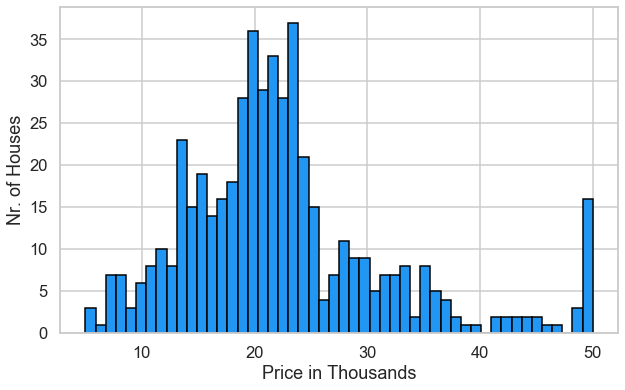

In [163]:

plt.figure(figsize = (10,6))
plt.hist(data['Price'], bins = 50, ec='black', color='#2196f3')
plt.xlabel('Price in Thousands')
plt.ylabel('Nr. of Houses')
plt.show()

In [164]:
## a quick look from our previou property price histogram shows not a normal distribution 
## there are a lot of data toward the righ hand side this is called a SKEW

In [166]:
data['Price'].skew() # a normal distribution is 0 but our distribution is 1.1

1.1080984082549072

In [169]:
data_log = np.log(data['Price'])  ## using the log function in our numpy we transforming the house price to get a better distibution
data_log.head()
data_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: Price, dtype: float64

In [171]:
data_log.skew() # our new skew is -0.33 which is closer to 0 than previous 1.1

-0.33032129530987864

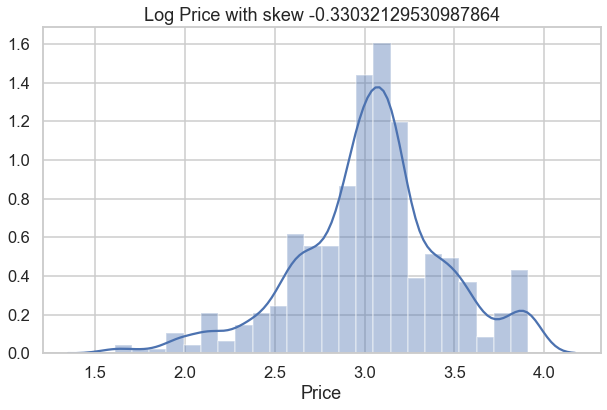

In [174]:
plt.figure(figsize = (10,6))
sns.distplot(data_log)
plt.title(f'Log Price with skew {data_log.skew()}')
plt.show()


## looking at our distribution we seen that it improved alot using the log function compare to previou distribution

C:\Users\Knowhow\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


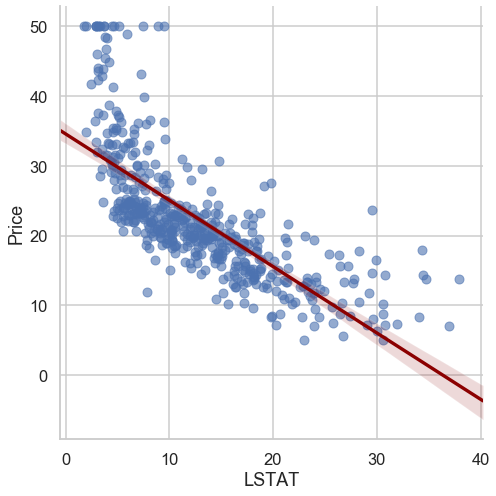

In [175]:
sns.lmplot(x='LSTAT', y = 'Price', data = data, size =7, 
           scatter_kws={'alpha': 0.6},line_kws= {'color': 'darkred'})
plt.show()

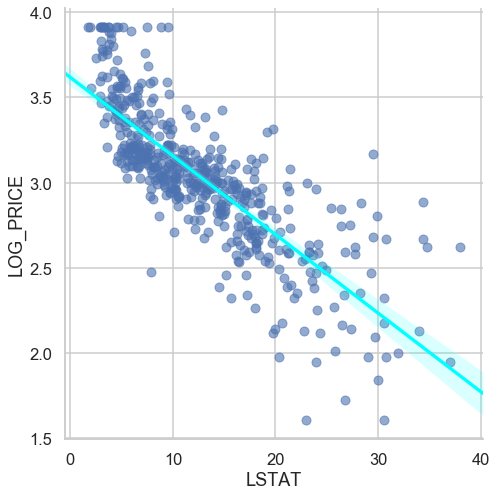

In [176]:

transformed_data = features
transformed_data['LOG_PRICE'] = data_log

sns.lmplot(x='LSTAT', y = 'LOG_PRICE', data = transformed_data, size =7, 
           scatter_kws={'alpha': 0.6},line_kws= {'color': 'cyan'})
plt.show()

In [177]:
## the two scatter plot shows us the different betwwen the normal price  and transformed price using log. 
## the log price shows more fitted than ordinary price
## will perform the whole regression of all the features using our new transformed price

## Regression using log prices

In [179]:
prices = np.log(data['Price'])  # use log prices
features = data.drop('Price', axis = 1)

X_train, X_test, y_train, y_test= train_test_split(features,prices, test_size=0.2, random_state = 10)


reg = LinearRegression()
reg.fit(X_train, y_train)

print ('Training data t-squared:' , reg.score(X_train, y_train))

print('Test data r-squared:', reg.score(X_test,y_test))


print('Intercept', reg.intercept_)
pd.DataFrame(data = reg.coef_, index = X_train.columns, columns = ['coef']) 


Training data t-squared: 0.7930234826697584
Test data r-squared: 0.744692230626073
Intercept 4.059943871775181


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [181]:
## after running our regression with log price we got a higer r-squared values there by a bette fit

# charles river premium(CHAS 0.080331) to get our values in dollars we make the calcution below

np.e**0.08331 # people ready to pay the premium of 1,087 ollar more compare to 1,900 previously 


1.0868786887226172

## p Values and Evaluating Coefficients

In [183]:
# if p-value < 0.05 means it statistically significant
# if p-value > 0.05 then not significant

In [190]:
X_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_const)
results = model.fit()

#results.params
#results.pvalues

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


##  Variance Inflation Factor (VIF) and Testing for Multicollinearity

$$ TAX = \alpha __0 + \alpha _1 CRIM + \alpha _2 ZN + \alpha _3 INDUS + ......+ \alpha _{12}LSTAT $$(regression for TAX)

$$ VIF_(TAX) = \frac{1}{(1-R_{TAX}^2)} $$

In [193]:
## multicollinearity is when two or more predicited variable  are highly correlated to another but not providing a unique or relevant
## information to the model.

## loss of reliability
## coefficient varies hihly in  small estimate
## strange or meaningless findings

In [197]:
## we calculate all 13 features VIF

In [199]:
variance_inflation_factor(exog=X_const.values, exog_idx= 1) ## chosing index 1 means Crime as we start to count from zero from our dataframe above
#Crime VIF = 1.7

1.7145250443932485

In [200]:
## rather than performing 12 other line of code to calculate VIF we write a loop that gives us everything in one code

In [212]:
len(X_const.columns)  ## both code gives us the number of columns in our dataframe
X_const.shape[1]

14

In [215]:
##loop to print out all the VIFs for all features


for i in range(X_const.shape[1]):
    print (variance_inflation_factor(exog=X_const.values, exog_idx = i))
print('ALL DONE!')

597.5487126763895
1.7145250443932485
2.3328224265597597
3.9434488226746396
1.0788133385000576
4.410320817897635
1.8404053075678561
3.3267660823099394
4.222923410477865
7.314299817005058
8.508856493040817
1.8399116326514064
1.3386713255364715
2.812544292793036
ALL DONE!


In [ ]:
## WE PUT THE VIF IN LIST

In [217]:
VIF = [] # empty list
for i in range(X_const.shape[1]):
     VIF.append(variance_inflation_factor(exog=X_const.values, exog_idx = i))
print(VIF)

[597.5487126763895, 1.7145250443932485, 2.3328224265597597, 3.9434488226746396, 1.0788133385000576, 4.410320817897635, 1.8404053075678561, 3.3267660823099394, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.8399116326514064, 1.3386713255364715, 2.812544292793036]


In [219]:
VIF = [variance_inflation_factor(exog=X_const.values, exog_idx = i)
    for i in range(X_const.shape[1])]

print(VIF)

[597.5487126763895, 1.7145250443932485, 2.3328224265597597, 3.9434488226746396, 1.0788133385000576, 4.410320817897635, 1.8404053075678561, 3.3267660823099394, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.8399116326514064, 1.3386713255364715, 2.812544292793036]


In [224]:
## for better observation it better to make a dataframe 


pd.DataFrame({'coef_name' : X_const.columns, 'vif': np.around(VIF, 2)})

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


In [225]:
## How do we interpret this data? the threshold for VIF is 10. so anything greater than 10 can cause multicollinearity but none of our 
## data is 10 so we ae finr.

## Baysian Information Criterion (BIC)

In [226]:
## in this section will performe model to eliminate some features which are statistically insignificant. 
## we could easily use the p-values we calculated previously with those bigger than 0.05 but then even least significant could affect our mode.
## by using baysian information criterion we can eliminate those model with high number.

In [228]:
# original model with log prices and all features


X_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is ', results.bic)
print('R-squared is', results.rsquared)## the bic and r-squared values when we use all features 

BIC is  -139.74997769478898
R-squared is 0.7930234826697584


In [230]:
# Reduced model 1 # exclude INDUS


X_const = sm.add_constant(X_train)
X_const = X_const.drop(['INDUS'], axis = 1)

model = sm.OLS(y_train, X_const)
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is ', results.bic)
print('R-squared is', results.rsquared) # removing the features industry we got more lowe bic but our r-squared reamins relatively the same
## industry has very little statisitcal significant. Will check for AGE below

BIC is  -145.14508855591185
R-squared is 0.7927126289415163


In [231]:
# Reduced model 2 # exclude INDUS and AGE

X_const = sm.add_constant(X_train)
X_const = X_const.drop(['INDUS', 'AGE'], axis = 1)

model = sm.OLS(y_train, X_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is ', results.bic)
print('R-squared is', results.rsquared) 

BIC is  -149.49934294224678
R-squared is 0.7918657661852815


In [232]:
# removing the features industry plus AGE we got more lowe bic but our r-squared reamins relatively the same
# we can safely say it better to drop  both from our analysis. 
# I will perform a quick model to show not all can be dropped

In [234]:
# Reduced model 3 # exclude RM and LSTAT ## just a test won't be in our dataframe


X_const = sm.add_constant(X_train)
X_const = X_const.drop(['RM', 'LSTAT'], axis = 1)

model = sm.OLS(y_train, X_const)
results = model.fit()

coef_minus_rm = pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

print('BIC is ', results.bic)
print('R-squared is', results.rsquared) # removing the features rooms(RM) we got bigger bic and our r-squared has significantly changed
## room and LSTAT are statisitcal significant.

BIC is  110.04694107556637
R-squared is 0.6043125929084776


In [235]:
frames = [org_coef,coef_minus_indus,reduced_coef]
pd.concat(frames, axis = 1) ##putting the three finding into a  dataframe for easy visualising the data

C:\Users\Knowhow\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,coef,p-value,coef,p-value,coef,p-value
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
B,0.000516,0.000,0.000511,0.000,0.000518,0.000
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
LSTAT,-0.031390,0.000,-0.031262,0.000,-0.030271,0.000
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
PTRATIO,-0.034795,0.000,-0.034126,0.000,-0.033481,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


In [236]:
## as we suspect removing the industry and age our reults for other features havn't been affect when comparing before removing them.

## Residual Analysis(part 1): Predicted vs Actual Values

In [237]:
## Here we be looking at the different in our predicted vs actual values and it call residual and be making plots

In [239]:
# modified model:(transformed using log price and dropping two features)


prices = np.log(data['Price'])  # use log prices
features = data.drop(['Price','INDUS', 'AGE'], axis = 1)

X_train, X_test, y_train, y_test= train_test_split(features,prices, test_size=0.2, random_state = 10)


# using Statmodel


X_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_const)
results = model.fit()

# Residuals

#residuals = y_train - results.fittedvalues
#residuals
results.resid # both code can use to get the same output


50    -0.056143
367    0.498215
34    -0.033868
78     0.043520
172    0.033242
         ...   
320   -0.041251
15    -0.033156
484    0.074891
125    0.008542
265   -0.214594
Length: 404, dtype: float64

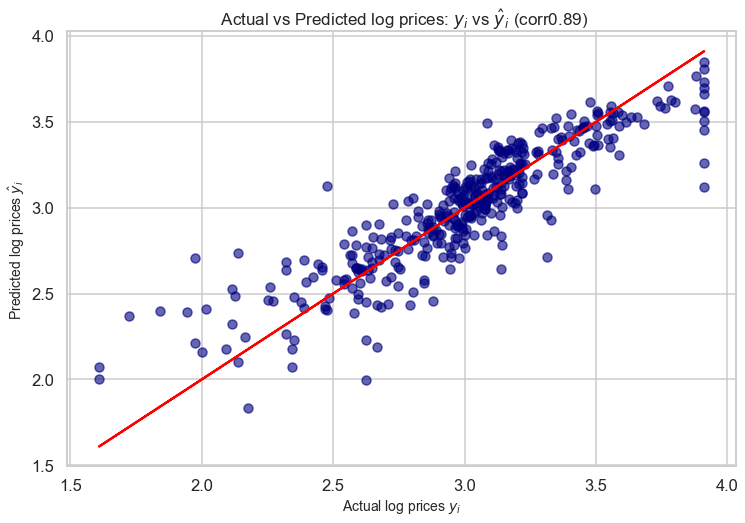

In [249]:
# Graph of Actual vs Predicted Prices
plt.figure(figsize =(12,8))
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y= results.fittedvalues,c='navy', alpha=0.6)
plt.plot(y_train,y_train, c='red')


plt.xlabel('Actual log prices $y_i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y_i$', fontsize=14)
plt.title(f' Actual vs Predicted log prices: $y_i$ vs $\hat y_i$ (corr{corr})', fontsize = 17)

plt.show()

## the graph shows us how our residual looks like the further from line the bad the model 

In [250]:
## the next graph will use our normal price in thousand not log prices to see the changes  by adding np.e**

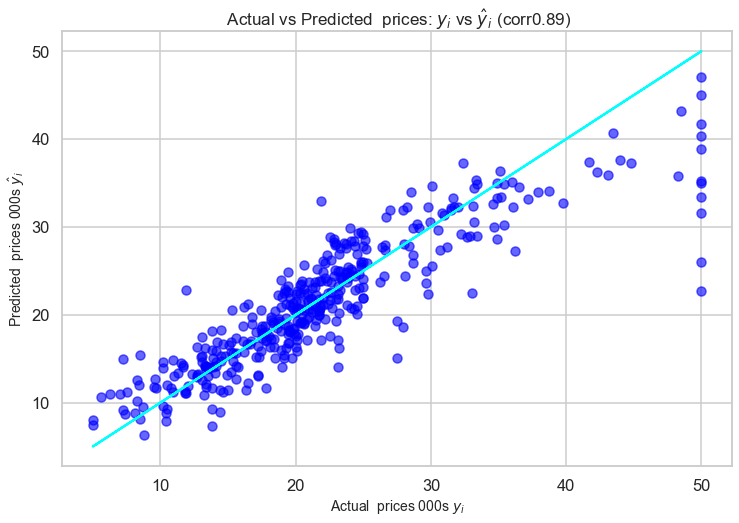

In [252]:
plt.figure(figsize =(12,8))
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=np.e**y_train, y= np.e**results.fittedvalues,c='blue', alpha=0.6)
plt.plot(np.e**y_train,np.e**y_train, c='cyan')


plt.xlabel('Actual  prices 000s $y_i$', fontsize=14)
plt.ylabel('Predicted  prices 000s $\hat y_i$', fontsize=14)
plt.title(f' Actual vs Predicted  prices: $y_i$ vs $\hat y_i$ (corr{corr})', fontsize = 17)

plt.show()

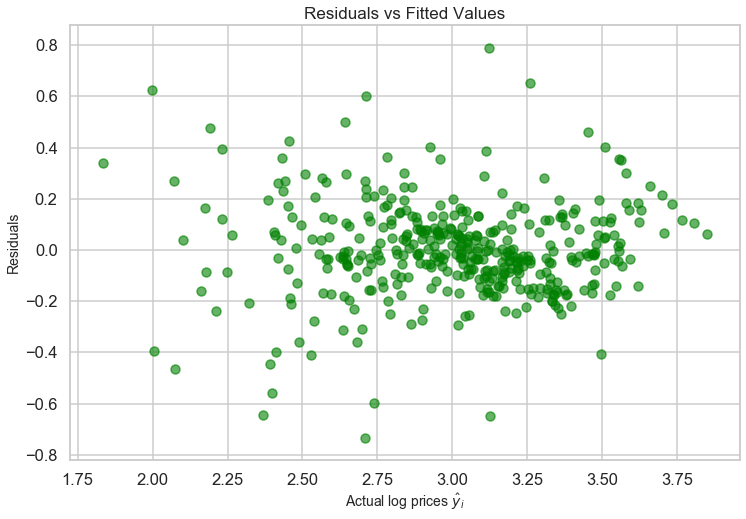

In [253]:
## Residuals vs Predicited values


plt.figure(figsize =(12,8))
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=results.fittedvalues, y=results.resid,c='green', alpha=0.6)



plt.xlabel('Actual log prices $\hat y_i $', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize = 17)

plt.show()
## the graph below will show that the poins resides mainly around the 0.0 on residual and abnormal high price house at extrem right side.

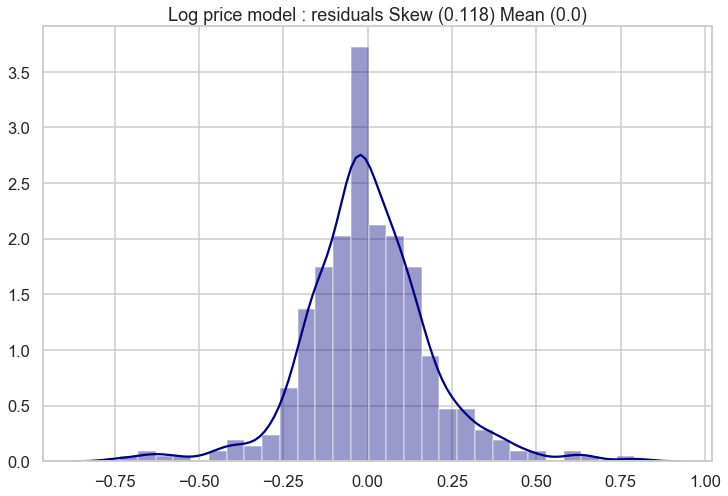

In [262]:
# Distribution of Residual (log prices) - checking for normality

resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)
resid_skew

plt.figure(figsize=(12,8))
sns.distplot(results.resid, color = 'navy')
plt.title(f'Log price model : residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

In [263]:
## table above show mean 0 no surprise as normal distributin moean is zero. The tail are longer on both side than normal distributin
## it shows there aremore values in extreme left and right than normal distribution.

In [278]:
# Original model : using normal price and all  features)


prices = data['Price']
features = data.drop(['Price'], axis = 1)

X_train, X_test, y_train, y_test= train_test_split(features,prices, test_size=0.2, random_state = 10)


X_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_const)
results = model.fit()

# Graph of Actual vs Predicted Prices
plt.figure(figsize =(12,8))
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y= results.fittedvalues,c='indigo', alpha=0.6)
plt.plot(y_train,y_train, c='red')


plt.xlabel('Actual  prices 000s $y_i$', fontsize=14)
plt.ylabel('Predicted prices 000s $\hat y_i$', fontsize=14)
plt.title(f' Actual vs Predicted prices: $y_i$ vs $\hat y_i$ (corr{corr})', fontsize = 17)

plt.show()


# Residuals vs Predicted values 
           
plt.figure(figsize =(12,8)
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=results.fittedvalues, y=results.resid,c='indigo', alpha=0.6)



plt.xlabel('Actual  prices $\hat y_i $', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize = 17)

plt.show()


# reisidual distribution
           
# Distribution of Residual (log prices) - checking for normality

resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)
resid_skew

plt.figure(figsize=(12,8))
sns.distplot(results.resid, color = indigo)
plt.title(f'residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()           


SyntaxError: invalid syntax (<ipython-input-278-19e77d1cd643>, line 31)

SyntaxError: invalid syntax (<ipython-input-272-f467f80c50cf>, line 4)

SyntaxError: invalid syntax (<ipython-input-273-baefe46a43ea>, line 4)

SyntaxError: invalid syntax (<ipython-input-274-2e7e5c806de8>, line 1)

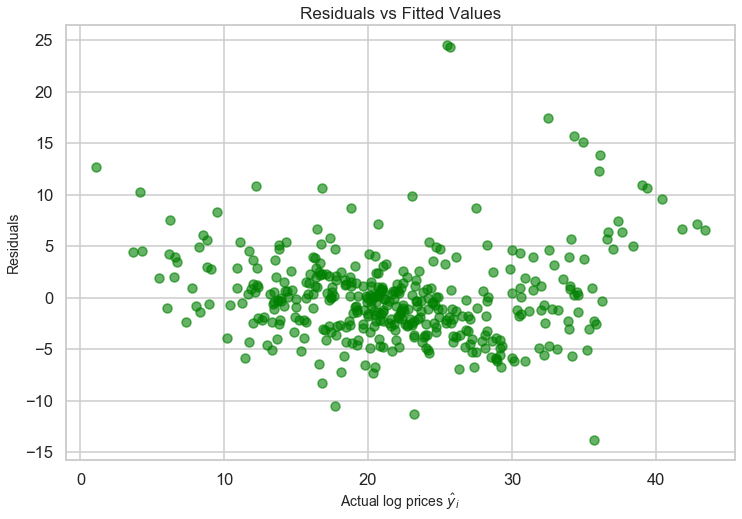